# Q1 Sobel

In [1]:
#libraries 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt

## a)

In [2]:
# generate random matrix with size n*n
def generateRandomMatrix(n):

  return np.random.randint(0, 256, size=(n, n))

In [3]:
def convolve(image, kernel):
    a = int((kernel.shape[0])/2)
    kernel = np.flipud(np.fliplr(kernel))
    s, t = kernel.shape
    w, h = image.shape
    image = cv2.copyMakeBorder(image, a, a, a ,a, cv2.BORDER_CONSTANT, value=0)
    w, h = image.shape
    new_image = np.zeros(( w - s + 1, h - t + 1))
    
    for i in range( w - s + 1):
        for j in range(h-t+1):
            new_image[i][j] = np.sum(image[i:i+s, j:j+t]*kernel)
    return new_image

In [4]:
# generate horizontal and vertical kernels
gx = np.array([[-1, 0 , +1],
                   [-2 , 0 , 2], 
                   [-1 , 0 , +1]
                   ])


gy = np.array([[-1, -2 , -1],
                   [0, 0 , 0], 
                   [1 , 2 , 1]
                   ])


In [5]:
# convolve the initial matrix with kernels
matrix = generateRandomMatrix(10)
sobelx = convolve( matrix, gx)
sobely = convolve(matrix , gy)

In [6]:
# generate magnitude and direction matrixes
direction = np.arctan2(sobelx , sobely)
value = np.power(sobelx, 2) + np.power(sobely , 2)
magnitude = np.power(value , 0.5)

print('magnitude: ' , magnitude) 



magnitude:  [[720.94382583 673.29636862 383.85413896 349.49391983 547.64404498
  474.4344001  478.13805538 593.52843234 670.61315227 840.24044178]
 [625.25034986 303.26556019 462.04978087 136.1322886  173.06646122
  183.61917111 307.14817271 305.49959083 148.66068747 827.37778554]
 [748.41966837 143.58969322 567.75346762 242.83739416 188.28170384
  169.71151994 253.99606296 353.11471224 371.40005385 777.41237448]
 [765.81198737 127.19276709 555.68516266 122.06555616 481.21512861
  469.81911413 386.25639153 140.86873322 387.75507734 463.77796412]
 [617.00081037 602.25243877 572.80537707 384.13799604 299.93332592
  177.79201332 118.06777715  74.02702209 334.42786965 570.32271566]
 [520.96257063 678.01622399 286.45767576 277.21832551 368.65702218
  518.74463853 492.31087739 366.41506519  89.89994438 647.63570007]
 [700.36847445 644.88293511 627.26868246 380.13155617 551.35650898
  599.80163388 305.89540696 619.25439038 402.71578067 867.72922044]
 [689.26192409 587.50319148 445.82507781 21

### show results
####  images differences

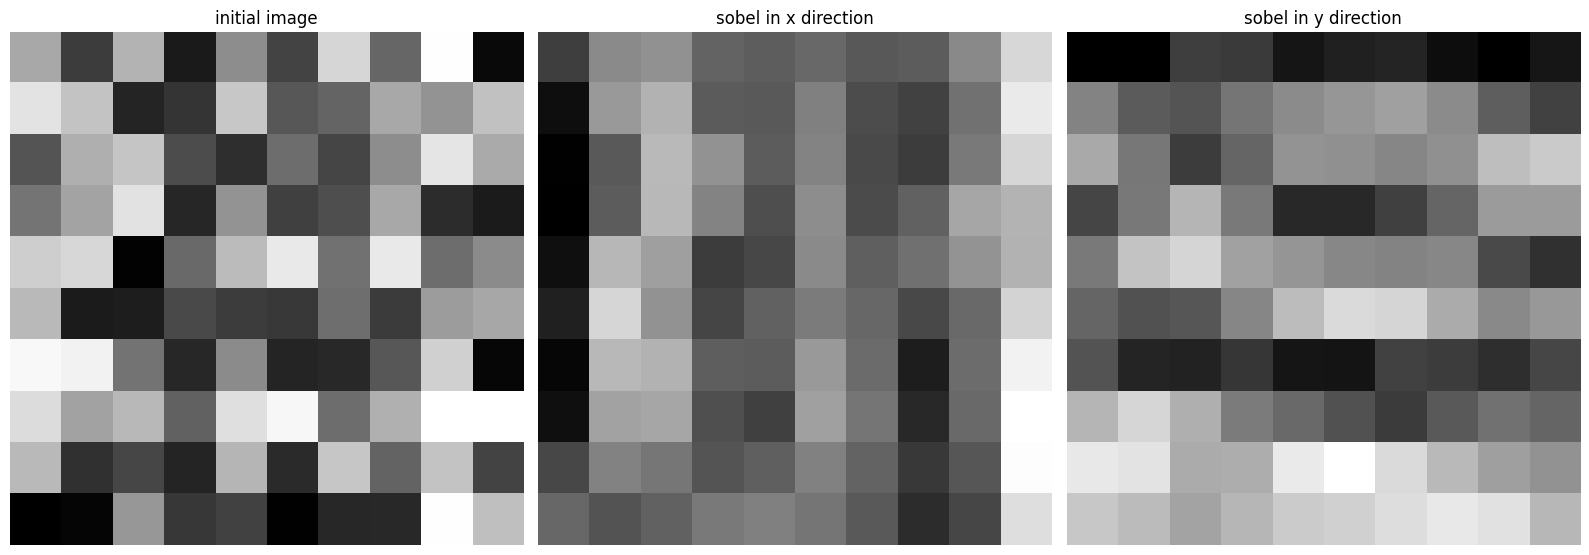

direction:  [[-2.68787028  2.8894095   2.55648022 -2.89592003 -2.9262907  -3.04024615
  -2.8224876  -2.92767513  2.89914563  2.2533438 ]
 [-1.48592844  2.13044423  2.01605298 -1.74802171 -0.98279372  0.5759186
  -0.82684906 -1.26146749  3.0472787   1.9353669 ]
 [-1.22453673 -1.66145621  2.19104581  2.03628555 -0.74031595  0.7937313
  -1.30385367 -1.21500874  0.15408229  0.98315048]
 [-1.94790795 -1.62585872  0.95933323  1.60357147 -2.68537985  2.73222913
  -2.48100362 -2.46685171  1.09676847  1.16986828]
 [-1.57241707  0.84884231  0.5410183  -0.98929183 -1.06240249  1.15999619
  -1.11472433 -0.02702045  2.41966843  2.31899082]
 [-1.78550943  1.88415156  2.2820731  -1.32669255 -0.24103132  0.13535407
  -0.11604075 -0.75837771 -0.44872334  1.31158641]
 [-1.86635594  2.35838747  2.40581512 -2.83148883 -2.9128906   2.69509474
  -3.03021341 -2.13281911 -3.08196194  1.89327574]
 [-1.08962942  0.5719511   0.8743349  -1.52816814 -1.85216481  2.17294542
   3.03953879 -1.92521499 -2.3779302   1.

In [7]:
images = [(matrix , 'initial image') , (sobelx  , 'sobel in x direction'), (sobely , 'sobel in y direction') ]

fig, (ax1, ax2 , ax3) = plt.subplots(nrows=1, ncols=3,figsize=(16, 16) ,
                                    sharex=True, sharey=True)
i = 0
for a in (ax1 , ax2, ax3):
        a.imshow(images[i][0] , cmap = 'gray')
        a.set_title(images[i][1])
        a.set_axis_off()
        i +=1
   
plt.tight_layout()
plt.show()
print('direction: ' , direction) 

## b)

In [8]:
# load image and convert it to gray scale
image = cv2.imread('images/afshin.jpg')
image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)

In [9]:
# define gaussian kernel
cguassian = cv2.getGaussianKernel(3, 1)
array = np.array([[cguassian[0][0] , cguassian[1][0] , cguassian[2][0] ] , 
                   [cguassian[1][0]  , 1.0 , cguassian[1][0] ], 
                   [cguassian[0][0] , cguassian[1][0] , cguassian[2][0]]])
coafficient = 1/np.sum(array)
kernel = coafficient * array


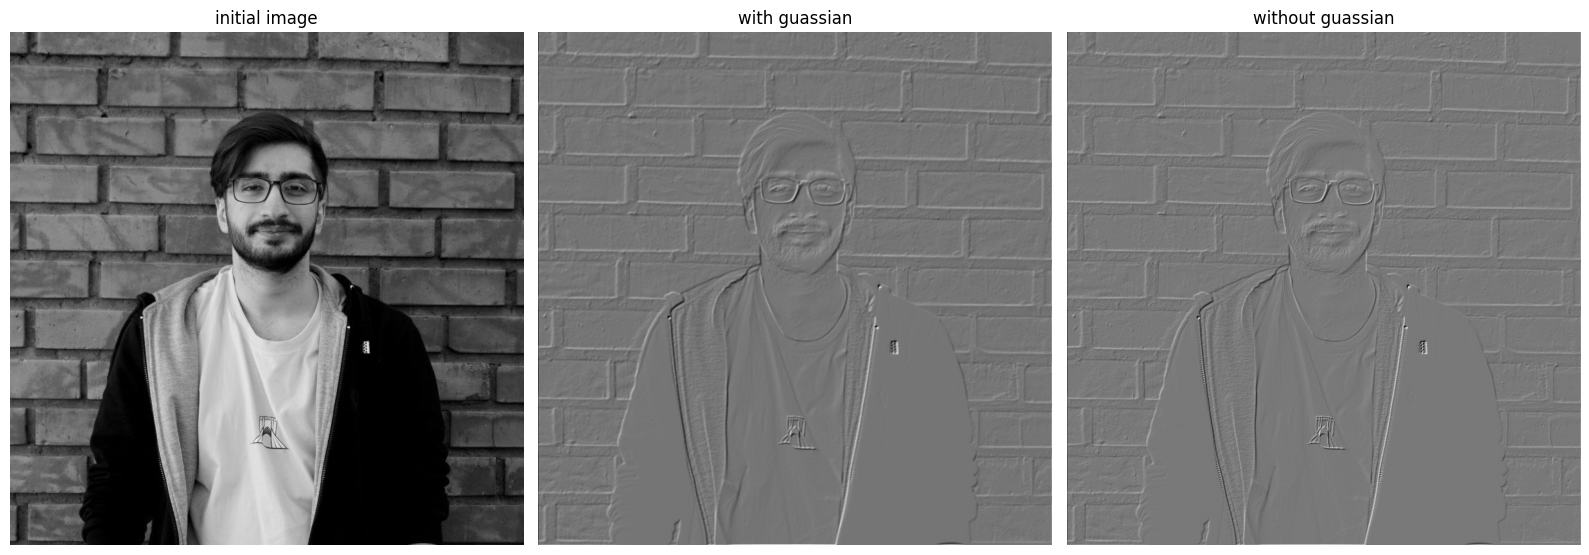

In [10]:
# generate Sobel outputs for 2 cases with gaussion filter and without gaussion filter and compare them
sobel_x = convolve(image, gx)
sobel_y = convolve(image , gy)
all = sobel_x + sobel_y
all = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)
blur = cv2.filter2D(image , -1, kernel=kernel)
sobel_x_b = convolve(blur , gx)
sobel_y_b = convolve(blur, gy)
all_blur = cv2.addWeighted(sobel_x_b, 0.5, sobel_y_b, 0.5, 0)
#show images

images = [(image ,  'initial image') , (all_blur  , 'with guassian'), (all , 'without guassian') ]

fig, (ax1, ax2 , ax3) = plt.subplots(nrows=1, ncols=3,figsize=(16, 16) ,
                                    sharex=True, sharey=True)
i = 0
for a in (ax1 , ax2, ax3):
        a.imshow(images[i][0] , cmap = 'gray')
        a.set_title(images[i][1])
        a.set_axis_off()
        i +=1
   
plt.tight_layout()
plt.show()



## c)

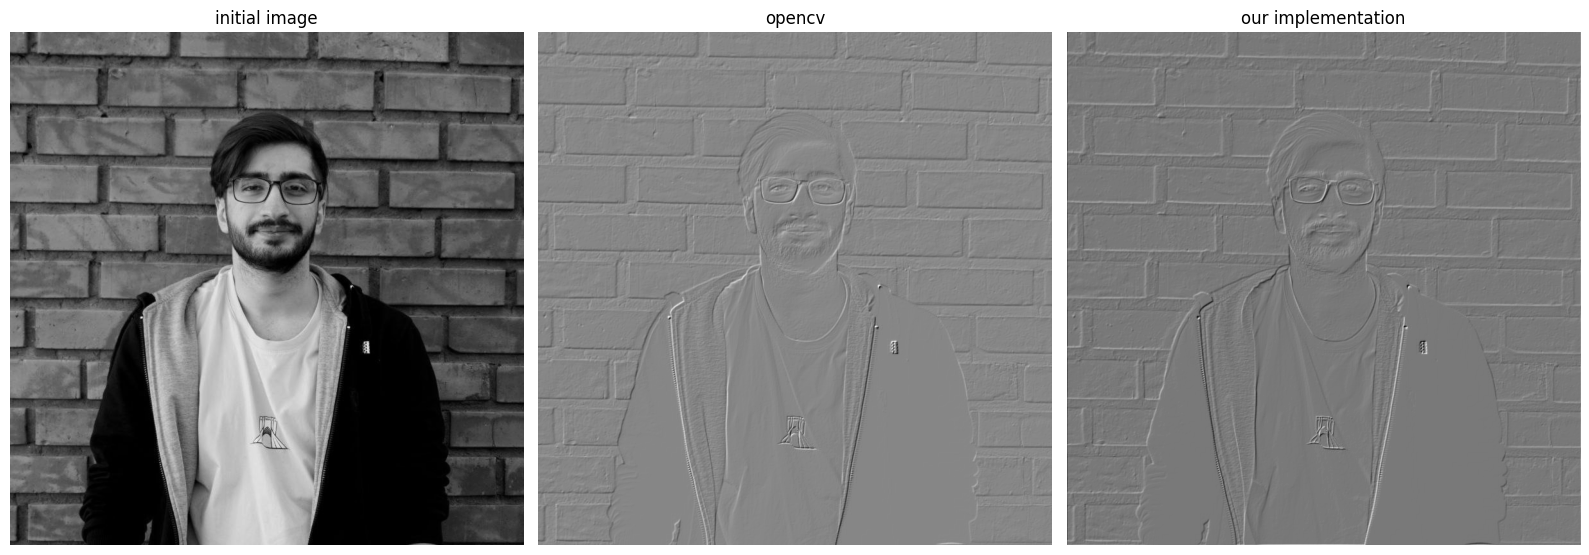

In [11]:
# do the operations in part b with OpenCV Sobel method and describe its parameters
sobelx = cv2.Sobel(src=image,  ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=image, ddepth=cv2.CV_64F , dx=0, dy=1, ksize=3) # Sobel Edge Detection on the Y axis
cv2im = sobelx+ sobely
combined = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
images = [(image, 'initial image') , ( combined , 'opencv'), (all , 'our implementation') ]

fig, (ax1, ax2 , ax3) = plt.subplots(nrows=1, ncols=3,figsize=(16, 16) ,
                                    sharex=True, sharey=True)
i = 0
for a in (ax1 , ax2, ax3):
        a.imshow(images[i][0] , cmap = 'gray')
        a.set_title(images[i][1])
        a.set_axis_off()
        i +=1
   
plt.tight_layout()
plt.show()
